# **Load Dataset and Explore Initial Data**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
csv_path = '/content/extended_activities.csv'
act_data = pd.read_csv(csv_path)

# Display the first 10 rows of the dataset
print("Preview of the dataset (First 10 rows):")
print(act_data.head(10))


Preview of the dataset (First 10 rows):
   Activity ID          Activity Date   Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07      Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01    Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29    Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17      Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08      Lunch Ride          Ride   
5   2961293151  27 Dec 2019, 23:38:08    Morning Ride          Ride   
6   2969244332  31 Dec 2019, 01:48:12      Lunch Ride          Ride   
7   2974544942   2 Jan 2020, 03:43:00  Afternoon Ride          Ride   
8   2979711652   3 Jan 2020, 23:27:55    Morning Ride          Ride   
9   2982905280   5 Jan 2020, 01:30:44      Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           




  **- Imported essential libraries including `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn` to perform data manipulation, visualization, and exploratory analysis.**


   **- Loaded the dataset named `'extended_activities.csv'` using Pandas to read and store it into a DataFrame for subsequent analysis.**


   **- Displayed the first 10 rows of the dataset to understand its structure, data types, and get an initial impression of the columns available for analysis.**

# **Date Formatting and Sorting**

In [ ]:
# Convert the 'Activity Date' column to a datetime object
act_data["Activity Date"] = pd.to_datetime(act_data["Activity Date"], errors='coerce')

# Sort the dataset by 'Activity Date' in ascending order
act_data.sort_values(by=["Activity Date"], inplace=True)

# Convert 'Activity Date' back to a string format for readability
act_data["Activity Date"] = act_data["Activity Date"].dt.strftime("%d-%m-%Y")


**- Converted the 'Activity Date' column to a datetime object to enable accurate sorting and manipulation of dates.**

**- Sorted the dataset by 'Activity Date' in ascending order to arrange activities chronologically.**

**- Converted 'Activity Date' back to a string format to improve readability, using a more conventional "day-month-year" representation.**

## **Filter Cycling Data**

In [ ]:
# Filter the dataset to include only cycling activities
act_data_cyc = act_data[act_data['Activity Type'] == 'Ride']

# Display the first 10 rows of filtered cycling data
print("\nFiltered cycling data (First 10 rows):")
print(act_data_cyc.head(10))



Filtered cycling data (First 10 rows):
   Activity ID Activity Date   Activity Name Activity Type  Elapsed Time  \
0   2929442069    13-12-2019      Lunch Ride          Ride          3859   
1   2945780637    20-12-2019    Morning Ride          Ride          4852   
2   2948028275    21-12-2019    Morning Ride          Ride          5817   
3   2952462113    24-12-2019      Lunch Ride          Ride          3851   
4   2956494096    26-12-2019      Lunch Ride          Ride          5843   
5   2961293151    27-12-2019    Morning Ride          Ride          6953   
6   2969244332    31-12-2019      Lunch Ride          Ride          5567   
7   2974544942    02-01-2020  Afternoon Ride          Ride          3727   
8   2979711652    03-01-2020    Morning Ride          Ride          7352   
9   2982905280    05-01-2020      Lunch Ride          Ride          5913   

   Distance  Max Heart Rate  Relative Effort  Commute Activity Gear  ...  \
0     22.97           139.0             11.0   

**- Filtered the dataset to include only rows where the 'Activity Type' is 'Ride', effectively isolating cycling activities for further analysis.**

**- Created a new dataset specifically for cycling data named `act_data_cyc`.**

**- Displayed the first 10 rows of the filtered dataset to preview the cycling-related activities.**

# **Cycling Data Exploration and Summary**

In [ ]:
# Generate summary statistics for cycling data
print("\nSummary statistics for cycling data:")
print(act_data_cyc.describe())

# Display information about the cycling dataset
print("\nCycling data information:")
print(act_data_cyc.info())

# Check for missing values in each column
missing_data = act_data_cyc.isnull().sum()

# Display missing values summary
print("\nCount of missing values in each column:")
print(missing_data)



Summary statistics for cycling data:
        Activity ID  Elapsed Time    Distance  Max Heart Rate  \
count  1.810000e+02    181.000000  181.000000      181.000000   
mean   5.716277e+09   7419.679558   54.417569      145.154696   
std    2.432000e+09   3703.592560   28.127591       13.875572   
min    2.929442e+09   1626.000000   10.960000      118.000000   
25%    3.218871e+09   5635.000000   38.110000      137.000000   
50%    7.128178e+09   6757.000000   50.890000      143.000000   
75%    8.084769e+09   7998.000000   60.970000      150.000000   
max    1.027158e+10  22391.000000  180.080000      209.000000   

       Relative Effort  Athlete Weight  Bike Weight   Moving Time   Max Speed  \
count       181.000000       70.000000        162.0    181.000000  181.000000   
mean         34.375691       80.228571          8.0   7155.767956   12.226391   
std          28.137406        0.935165          0.0   3568.567951    2.235716   
min           5.000000       80.000000          8.0 

**- Generated summary statistics for the cycling dataset, providing insights like mean, standard deviation, and distribution values for numerical columns.**

**- Displayed detailed information about the cycling data including data types, non-null counts, and memory usage to understand the structure of the dataset.**

**- Checked for missing values in each column and displayed the count of missing values, highlighting which features have incomplete data.**

# **PART A**

# **Visualizing Effort vs. Performance Metrics (Speed & Distance)**

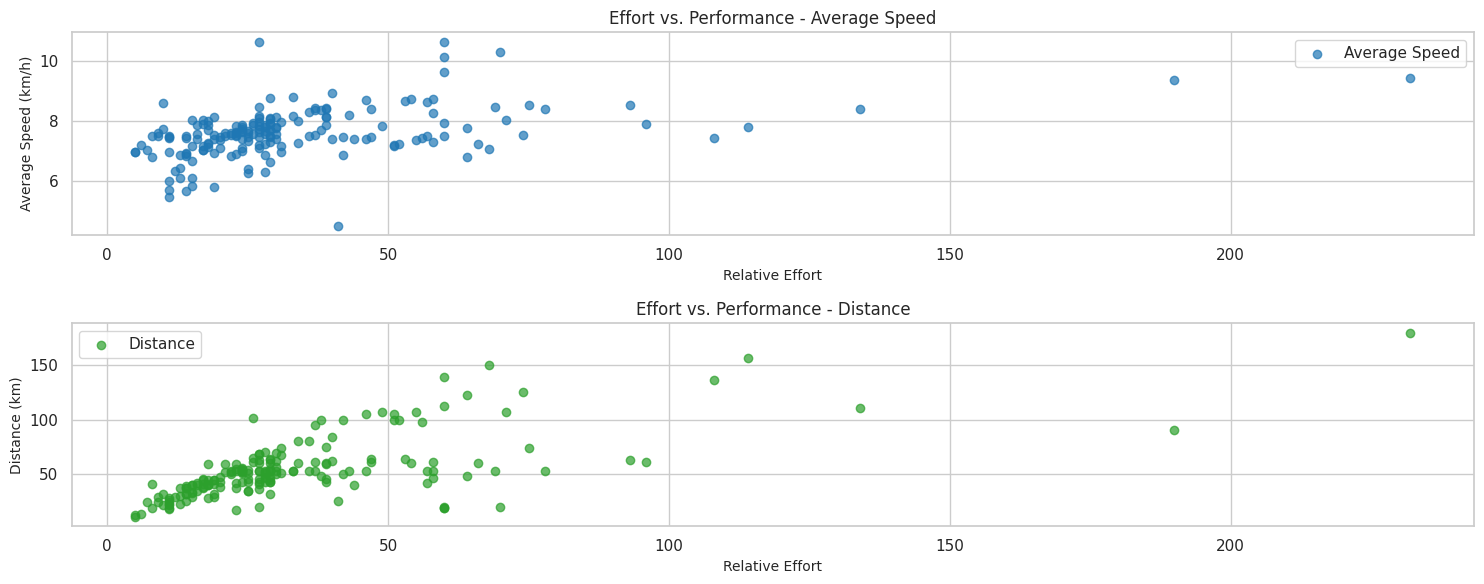

In [ ]:
# Function to compare Relative Effort vs. Performance metrics
def plot_effort_vs_performance(data, x_data, y1, y2, title="", xlabel='Relative Effort', ylabel1='Average Speed (km/h)', ylabel2='Distance (km)', dpi=100):
    plt.figure(figsize=(15, 6), dpi=dpi)

    # Plot Average Speed vs. Relative Effort
    plt.subplot(2, 1, 1)
    plt.scatter(x_data, y1, color='tab:blue', alpha=0.7, label='Average Speed')
    plt.title(f'{title} - Average Speed', fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel1, fontsize=10)
    plt.grid(True, axis='both')
    plt.legend()

    # Plot Distance vs. Relative Effort
    plt.subplot(2, 1, 2)
    plt.scatter(x_data, y2, color='tab:green', alpha=0.7, label='Distance')
    plt.title(f'{title} - Distance', fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel2, fontsize=10)
    plt.grid(True, axis='both')
    plt.legend()

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

    # Call the function with cycling data for Effort vs. Performance
plot_effort_vs_performance(
    data=act_data_cyc,
    x_data=act_data_cyc['Relative Effort'],
    y1=act_data_cyc['Average Speed'],
    y2=act_data_cyc['Distance'],
    title='Effort vs. Performance'
)



## **Visualizing Effort vs. Performance Metrics (Speed & Distance)**
This analysis aims to explore the relationship between "Relative Effort" and key performance metrics, namely "Average Speed" and "Distance." It provides a visual representation to understand how the effort impacts these performance metrics during cycling activities.

### Objective
The main objective of this analysis is to determine whether increased relative effort correlates with changes in speed or distance. It helps to evaluate the impact of physical effort on performance outcomes and identify potential trends or patterns in athletic data.

### Trends/Patterns Found
- In the "Relative Effort" vs. "Average Speed" plot, there appears to be no consistent trend indicating a strong relationship. The speed values remain clustered between 6-10 km/h, irrespective of effort.
- In the "Relative Effort" vs. "Distance" plot, there is a positive trend, indicating that increased effort generally correlates with greater distance, especially up to a moderate effort level.
- The plots provide valuable insights, suggesting that while speed remains relatively constant, greater effort primarily affects distance, revealing distinct dynamics in how cyclists respond to increasing effort.

# Power Output Zones

## Defining and Visualization of Power Output Zones

<ipython-input-243-caf7ee5c2b3b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data_cyc['Power Zone'] = act_data_cyc['Weighted Average Power'].apply(categorize_power_zone)



Distribution of rides across power zones:
Power Zone
Moderate Intensity (100-200W)    172
High Intensity (>200W)             9
Name: count, dtype: int64


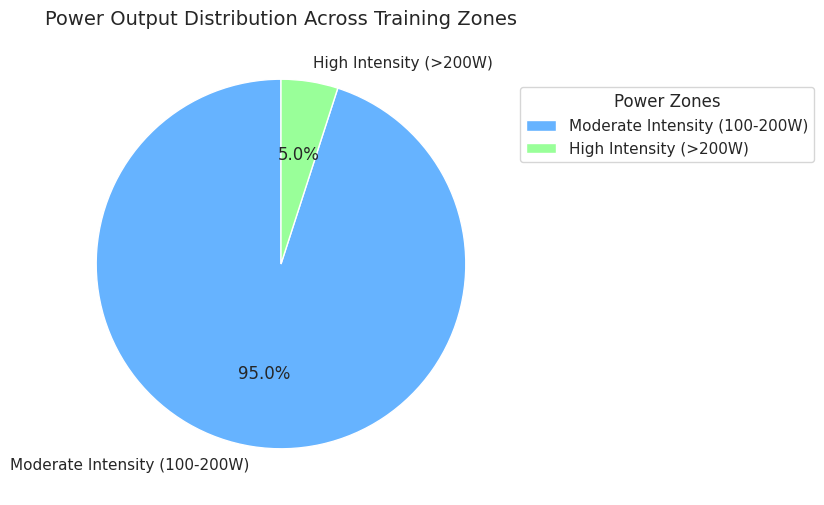

In [ ]:
# Define power zones based on Weighted Average Power (WAP)
def categorize_power_zone(wap):
    if wap < 100:
        return 'Low Intensity (<100W)'
    elif 100 <= wap <= 200:
        return 'Moderate Intensity (100-200W)'
    else:
        return 'High Intensity (>200W)'

# Apply the categorization to the dataset
act_data_cyc['Power Zone'] = act_data_cyc['Weighted Average Power'].apply(categorize_power_zone)

# Count the number of sessions in each power zone
power_zone_counts = act_data_cyc['Power Zone'].value_counts()

# Display power zone counts
print("\nDistribution of rides across power zones:")
print(power_zone_counts)

# Plot the distribution of power zones
plt.figure(figsize=(8, 6))
plt.pie(
    power_zone_counts,
    labels=power_zone_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ff9999']
)

# Include title and lables
plt.title('Power Output Distribution Across Training Zones', fontsize=14)
plt.legend(title="Power Zones", loc='upper left', bbox_to_anchor=(1, 0.9))
plt.show()


## **Power Output Zones**
This analysis categorizes cycling sessions based on the "Weighted Average Power" (WAP) output into different intensity zones. It visualizes the distribution of rides across power output zones to better understand the training intensity of different sessions.

### Objective
The aim is to determine how many cycling sessions fall under each power intensity category: Low, Moderate, or High. This helps in understanding the distribution of training efforts and identifying trends in training intensities.

### Steps
- A function `categorize_power_zone` was created to classify power output into three categories: Low, Moderate, and High Intensity.
- This function was applied to each cycling session to assign a "Power Zone" category.
- The number of rides in each power zone was counted and visualized as a pie chart to represent the proportion of training efforts across different power levels.

### Trends/Patterns Found
- The pie chart shows that the majority of cycling sessions fall under the "Moderate Intensity (100-200W)" zone, making up 95% of the total sessions.
- Only a small fraction of the rides (5%) are in the "High Intensity (>200W)" category, indicating limited high-power training efforts.
- There are no rides in the "Low Intensity" category, which could mean that most training efforts maintain at least a moderate intensity level.

# **Seasonal Categorization**

## Function to Assign Seasons

In [ ]:
# Function to assign season based on the month
def assign_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Summer'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Autumn'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Winter'
    else:  # September, October, November
        return 'Spring'

# Add a Season column to the DataFrame
act_data_cyc['Season'] = pd.to_datetime(act_data_cyc['Activity Date'], format='%d-%m-%Y').dt.month.apply(assign_season)

# Display the first few rows with the new 'Season' column
print("First few rows with the added 'Season' column:")
print(act_data_cyc[['Activity Date', 'Season', 'Average Speed', 'Distance', 'Max Heart Rate']].head(10))


First few rows with the added 'Season' column:
  Activity Date  Season  Average Speed  Distance  Max Heart Rate
0    13-12-2019  Summer          5.989     22.97           139.0
1    20-12-2019  Summer          6.343     29.65           133.0
2    21-12-2019  Summer          5.800     32.38           139.0
3    24-12-2019  Summer          5.697     21.68           140.0
4    26-12-2019  Summer          5.657     32.36           131.0
5    27-12-2019  Summer          6.111     32.84           139.0
6    31-12-2019  Summer          6.412     34.98           147.0
7    02-01-2020  Summer          6.846     25.22           142.0
8    03-01-2020  Summer          6.252     45.79           140.0
9    05-01-2020  Summer          5.818     34.01           136.0


<ipython-input-244-726637d17064>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data_cyc['Season'] = pd.to_datetime(act_data_cyc['Activity Date'], format='%d-%m-%Y').dt.month.apply(assign_season)


##Seasonal Performance Analysis and Visualization (Aggregated Statistics)

In [ ]:
# Group the cycling data by 'Season' and calculate mean for key metrics
seasonal_stats = act_data_cyc.groupby('Season').agg({
    'Average Speed': 'mean',
    'Distance': 'mean',
    'Max Heart Rate': 'mean',
    'Weighted Average Power': 'mean'
}).reset_index()

# Display the aggregated statistics
print("\nSeasonal performance statistics:")
print(seasonal_stats)



Seasonal performance statistics:
   Season  Average Speed   Distance  Max Heart Rate  Weighted Average Power
0  Autumn       7.753594  60.126800          142.00              166.800000
1  Spring       7.687492  63.344878          150.00              163.121951
2  Summer       7.320540  42.486769          141.80              149.292308
3  Winter       7.942038  59.378400          152.24              174.120000


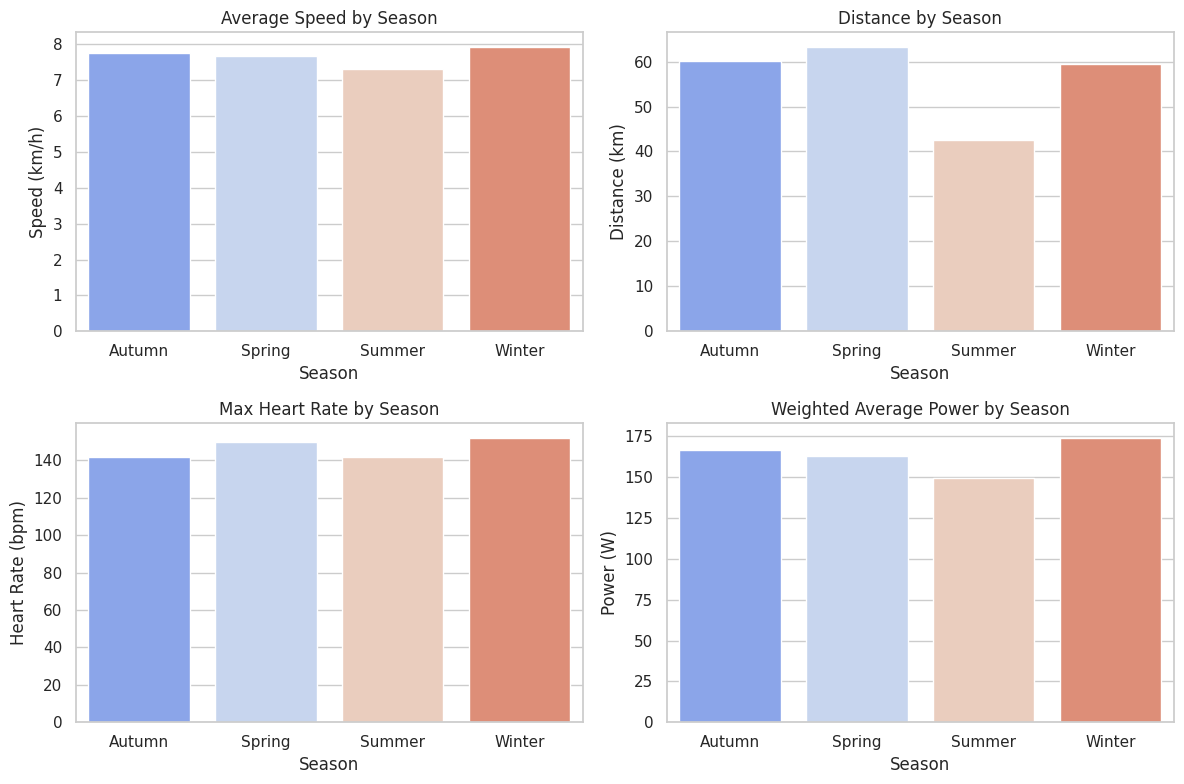

In [ ]:
# Plot bar charts for seasonal performance trends
plt.figure(figsize=(12, 8))

# Average Speed by Season
plt.subplot(2, 2, 1)
sns.barplot(x='Season', y='Average Speed', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Average Speed by Season')
plt.ylabel('Speed (km/h)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Distance by Season
plt.subplot(2, 2, 2)
sns.barplot(x='Season', y='Distance', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Distance by Season')
plt.ylabel('Distance (km)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Max Heart Rate by Season
plt.subplot(2, 2, 3)
sns.barplot(x='Season', y='Max Heart Rate', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Max Heart Rate by Season')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Weighted Average Power by Season
plt.subplot(2, 2, 4)
sns.barplot(x='Season', y='Weighted Average Power', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Weighted Average Power by Season')
plt.ylabel('Power (W)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


## **Seasonal Categorization**
This analysis explores the seasonal variations in performance metrics such as average speed, distance, maximum heart rate, and weighted average power.

### Objective
The goal is to determine if different seasons have any significant impact on various cycling performance metrics and to observe how these metrics change throughout the year.

### Steps
- Each ride is categorized into a season (Summer, Autumn, Winter, Spring) based on the date of the activity.
- The dataset is grouped by season, and mean values for key metrics are computed.
- Bar plots are used to visualize the average performance for each metric across different seasons.

### Trends/Patterns Found
- Winter and Autumn have higher average speeds and weighted average power compared to other seasons, indicating higher intensity in cooler months.
- Spring records the longest average distance, while summer shows lower average distances.
- Maximum heart rate is slightly higher in winter and spring, possibly indicating increased effort during these periods.

#Fatigue and Recovery Trend

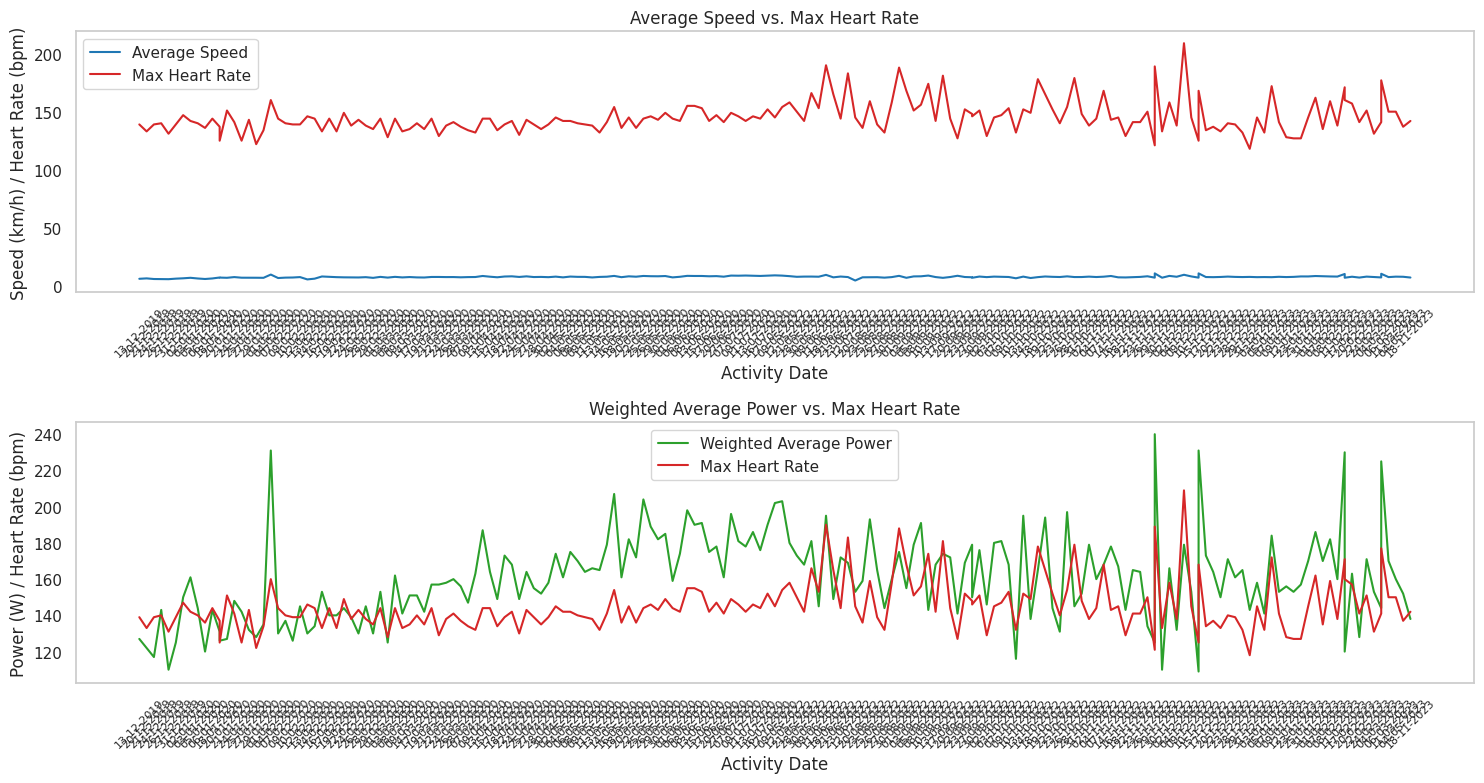

In [ ]:
# Plot fatigue and recovery trends
def plot_fatigue_recovery(data, date_col, avg_speed, max_hr, power, title="Fatigue and Recovery Analysis"):
    plt.figure(figsize=(15, 8))

    # Average Speed vs. Max Heart Rate
    plt.subplot(2, 1, 1)
    plt.plot(data[date_col], data[avg_speed], color='tab:blue', label='Average Speed')
    plt.plot(data[date_col], data[max_hr], color='tab:red', label='Max Heart Rate')
    plt.title('Average Speed vs. Max Heart Rate')
    plt.xlabel('Activity Date')
    plt.ylabel('Speed (km/h) / Heart Rate (bpm)')
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.grid()

    # Weighted Average Power vs. Max Heart Rate
    plt.subplot(2, 1, 2)
    plt.plot(data[date_col], data[power], color='tab:green', label='Weighted Average Power')
    plt.plot(data[date_col], data[max_hr], color='tab:red', label='Max Heart Rate')
    plt.title('Weighted Average Power vs. Max Heart Rate')
    plt.xlabel('Activity Date')
    plt.ylabel('Power (W) / Heart Rate (bpm)')
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Call the function
plot_fatigue_recovery(
    data=act_data_cyc,
    date_col='Activity Date',
    avg_speed='Average Speed',
    max_hr='Max Heart Rate',
    power='Weighted Average Power',
    title='Fatigue and Recovery Analysis'
)


## **Fatigue and Recovery Trend**
This analysis aims to explore the relationship between fatigue and recovery trends through the comparison of key performance metrics over time.

### Objective
The focus is to determine how metrics like maximum heart rate correlate with performance indicators such as average speed and weighted average power over time, shedding light on athlete fatigue and recovery trends.

### Steps
- The activity data is plotted over time to compare average speed, maximum heart rate, and weighted average power.
- Two line charts are generated to observe these variables: one comparing average speed and max heart rate, and the other comparing weighted average power and max heart rate.

### Trends/Patterns Found
- The max heart rate values are generally consistent, while fluctuations in weighted average power indicate varying intensity, which is linked to fatigue and recovery cycles.
- There is a clear difference between speed and heart rate trends, suggesting that speed does not fluctuate as much as the heart rate, indicating the athlete’s effort levels and potential fatigue phases.

#Heart Rate and Speed Trend over Time

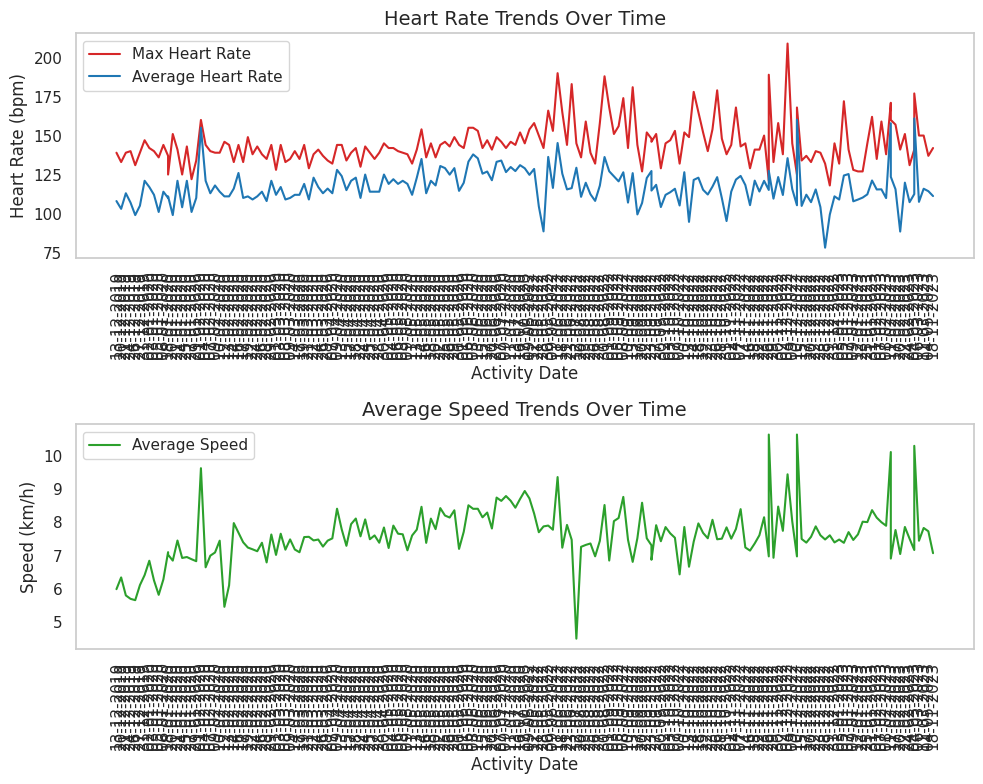

In [ ]:
# Plot Heart Rate vs. Average Speed
plt.figure(figsize=(10, 8))

# Max Heart Rate vs. Average Speed over Time
plt.subplot(2, 1, 1)
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Max Heart Rate'], label='Max Heart Rate', color='tab:red')
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Average Heart Rate'], label='Average Heart Rate', color='tab:blue')
plt.title('Heart Rate Trends Over Time', fontsize=14)
plt.xlabel('Activity Date', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.legend()
plt.xticks(rotation=90)
plt.grid()

# Average Speed over Time
plt.subplot(2, 1, 2)
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Average Speed'], label='Average Speed', color='tab:green')
plt.title('Average Speed Trends Over Time', fontsize=14)
plt.xlabel('Activity Date', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.legend()
plt.xticks(rotation=90)
plt.grid()

plt.tight_layout()
plt.show()


## **Heart Rate and Speed Trend over Time**

This analysis visualizes trends in heart rate and speed over time for cycling activities, providing insights into the variability of these parameters.

### Objective
The objective is to observe how the maximum and average heart rates, as well as average speed, change across different rides to understand performance consistency and cardiovascular effort over time.

### Trends/Patterns Found
- The maximum heart rate shows peaks and troughs, indicating variable exertion levels across different activities, which could suggest changes in workout intensity.
- Average speed tends to fluctuate but remains relatively stable, implying consistent riding effort despite changing heart rate levels. This may indicate effective cardiovascular adaptation over time.

# **Anamoly Session Detection**

### Identify Outliers Using Z-Scores

In [ ]:
from scipy.stats import zscore

# Select relevant columns for anomaly detection
metrics = ['Average Speed', 'Max Heart Rate', 'Distance', 'Weighted Average Power']

# Calculate Z-scores for the metrics
z_scores = act_data_cyc[metrics].apply(zscore)

# Identify sessions with any metric exceeding ±3 Z-scores
outliers = (z_scores.abs() > 3).any(axis=1)

# Filter and display outlier sessions
outlier_sessions = act_data_cyc[outliers]
print("\nDetected Outlier sessions:")
print(outlier_sessions[['Activity Date', 'Average Speed', 'Max Heart Rate', 'Distance', 'Weighted Average Power']])



Detected Outlier sessions:
    Activity Date  Average Speed  Max Heart Rate  Distance  \
119    11-06-2022       9.370151           190.0     91.16   
131    12-07-2022       4.495522           145.0     25.84   
143    30-08-2022       8.526998           188.0     63.39   
201    28-10-2022       7.511878           148.0    139.09   
209    04-11-2022       7.804596           168.0    156.53   
225    26-11-2022      10.652390           189.0     20.50   
237    04-12-2022       9.453102           209.0    180.08   
238    10-12-2022      10.652900           168.0     19.65   
300    04-03-2023      10.312165           177.0     20.48   
343    18-11-2023       7.074378           142.0    150.03   

     Weighted Average Power  
119                   195.0  
131                   153.0  
143                   175.0  
201                   152.0  
209                   168.0  
225                   240.0  
237                   179.0  
238                   231.0  
300                

### Visualize Outliers

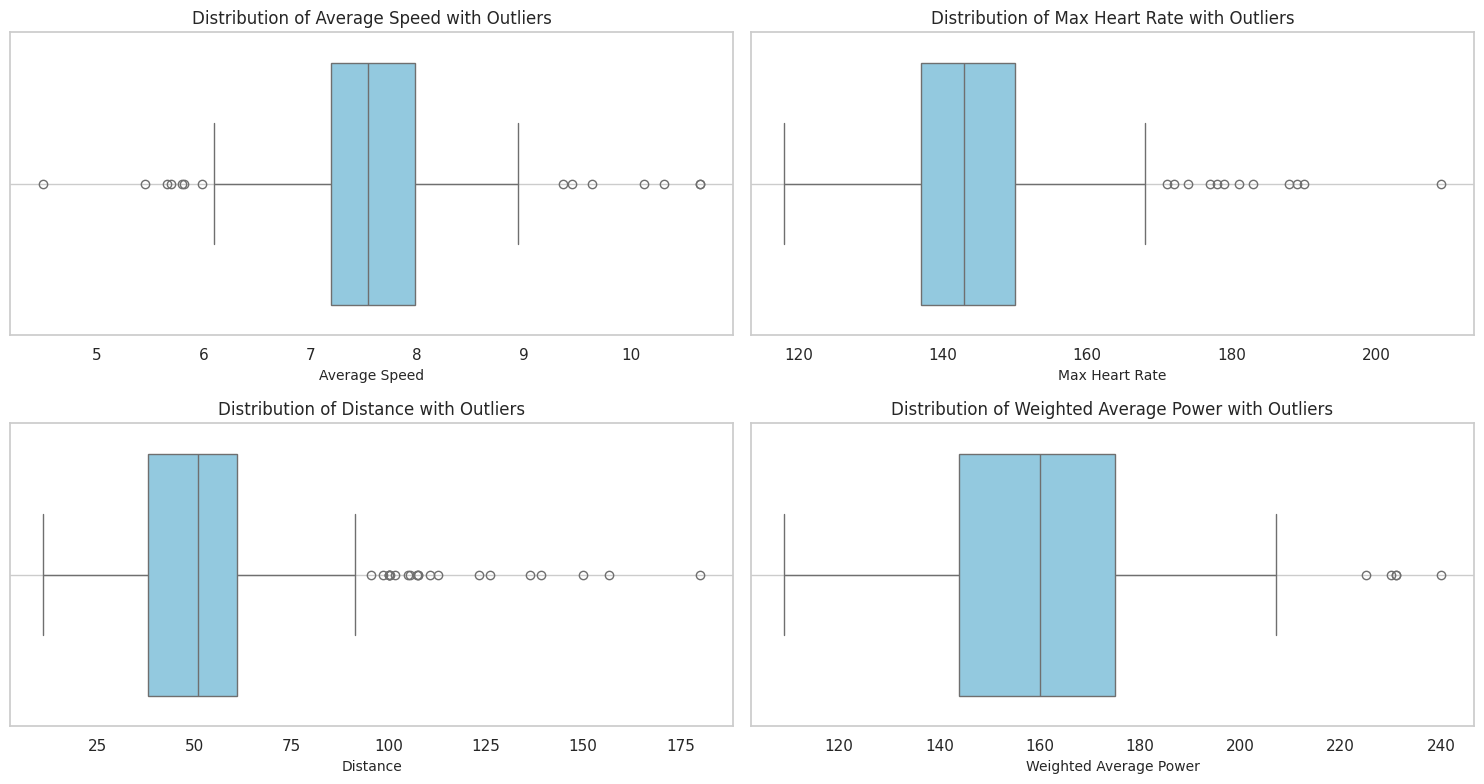

In [ ]:
# Plot box plots for key metrics with outliers
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=act_data_cyc, x=metric, color='skyblue')
    plt.title(f"Distribution of {metric} with Outliers", fontsize=12)
    plt.xlabel(metric, fontsize=10)
    plt.grid()

plt.tight_layout()
plt.show()


## **Anamoly Session Detection**

This analysis aims to detect anomalies (outliers) in key performance metrics using statistical methods.

### Objective
The goal is to identify sessions that deviate significantly from the typical range in metrics such as Average Speed, Max Heart Rate, Distance, and Weighted Average Power.

### Steps
- **Z-Score Calculation**: Z-scores for selected metrics were computed to determine how many standard deviations each value is from the mean.
- **Outlier Detection**: Sessions where Z-scores exceeded ±3 were flagged as outliers.
- **Box Plot Visualization**: Box plots were used to illustrate the distribution of metrics, highlighting potential outliers.

### Trends/Patterns Found
- Metrics like Average Speed, Max Heart Rate, Distance, and Weighted Average Power have visible outliers that exceed the normal data range.
- The outliers indicate sessions with particularly high intensity or anomalies in measurements, which might require further investigation or correction to ensure data integrity.

# **Training Volume vs. Intensity Balance**

### Plot for Volume vs. Intensity

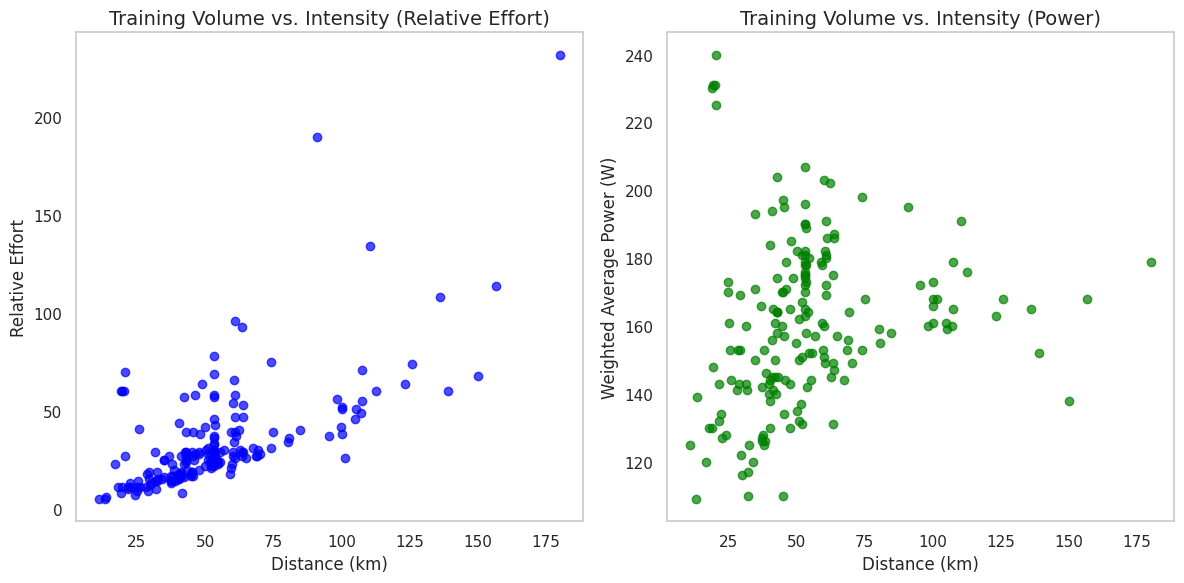

In [ ]:
# Plot Distance vs. Relative Effort
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(act_data_cyc['Distance'], act_data_cyc['Relative Effort'], alpha=0.7, color='blue')
plt.title('Training Volume vs. Intensity (Relative Effort)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Relative Effort', fontsize=12)
plt.grid()

# Plot Distance vs. Weighted Average Power
plt.subplot(1, 2, 2)
plt.scatter(act_data_cyc['Distance'], act_data_cyc['Weighted Average Power'], alpha=0.7, color='green')
plt.title('Training Volume vs. Intensity (Power)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Weighted Average Power (W)', fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


### Correlation of Weighted Average Power and Relative Effort Between Distance

In [ ]:
# Calculate correlation coefficients
correlation_effort = act_data_cyc['Distance'].corr(act_data_cyc['Relative Effort'])
correlation_power = act_data_cyc['Distance'].corr(act_data_cyc['Weighted Average Power'])

print(f"Correlation between Distance and Relative Effort: {correlation_effort:.2f}")
print(f"Correlation between Distance and Weighted Average Power: {correlation_power:.2f}")


Correlation between Distance and Relative Effort: 0.66
Correlation between Distance and Weighted Average Power: 0.18


## **Training Volume vs. Intensity Balance**
This analysis visualizes the relationship between training volume (distance) and training intensity using metrics like Relative Effort and Weighted Average Power.

### Ojective
The goal is to explore how the training intensity (effort and power) scales with the training volume (distance).

### Steps
- **Scatter Plot for Relative Effort vs Distance**: Created to illustrate how relative effort changes with varying distances.
- **Scatter Plot for Weighted Average Power vs Distance**: Created to explore the correlation between power and distance.
- **Correlation Calculation**: Correlation coefficients between distance and both metrics (Relative Effort and Power) were calculated to quantify the relationships.

### Trends/Patterns Found
- **Positive Correlation with Relative Effort**: There is a moderate positive correlation (0.66) between distance and relative effort, indicating that as distance increases, effort generally rises.
- **Weak Correlation with Weighted Power**: The correlation between distance and weighted power is relatively weak (0.18), suggesting power output remains more consistent across distances.

# **PART B**

# **Prediction Of Calories Using Linear and Random Forest Regressor**

### Selecting Columns and Clean the Data

In [ ]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Select relevant columns for the analysis
cycling_data = act_data_cyc[['Calories', 'Distance', 'Max Heart Rate', 'Max Speed', 'Max Cadence']]

# Step 3: Handle missing values by dropping rows with NaN values
cycling_data = cycling_data.dropna()

# Display the cleaned dataset
print("Cleaned cycling data:")
print(cycling_data.head(10))



Cleaned cycling data:
   Calories  Distance  Max Heart Rate  Max Speed  Max Cadence
0     141.0     22.97           139.0  10.200000         94.0
1     148.0     29.65           133.0  14.100000         83.0
2     253.0     32.38           139.0  12.000000         90.0
3     217.0     21.68           140.0  11.400000         95.0
4     178.0     32.36           131.0  10.900000         85.0
5     241.0     32.84           139.0  12.800000        107.0
6     535.0     34.98           147.0  12.800000        103.0
7     319.0     25.22           142.0  13.200000         99.0
8     460.0     45.79           140.0  13.000000        105.0
9     218.0     34.01           136.0  16.200001         99.0


### Splitting Train and Test Data

In [ ]:
# Step 4: Split the data into independent variables (X) and the dependent variable (y)
X = cycling_data[['Distance', 'Max Heart Rate', 'Max Speed', 'Max Cadence']]  # Features
y = cycling_data['Calories']  # Target variable

# Step 5: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training data: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data: (144, 4)
Testing data shape: (37, 4)


### Linear Model Training

In [ ]:
# Step 6: Initialize the Linear Regression model
lin_model_calorie = LinearRegression()

# Step 7: Train the model using the training data
lin_model_calorie.fit(X_train, y_train)

# Step 8: Display the model coefficients and intercept
print("Model Coefficients (Weights):", lin_model_calorie.coef_)
print("Model Intercept:", lin_model_calorie.intercept_)


Model Coefficients (Weights): [18.44802809 12.04038484 41.20909863  1.86864671]
Model Intercept: -2576.0935706509645


#### Making Predictions and DIsplay of Models' Performance

In [ ]:
# Step 9: Make predictions on the testing data
y_pred = lin_model_calorie.predict(X_test)

# Step 10: Evaluate the model using Mean Absolute Error (MAE) and R² score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 11: Display evaluation metrics
print("Linear Regression - Mean Absolute Error (MAE):", mae)
print("Linear Regression- R² Score:", r2)

# Step 12: Display actual vs predicted calories
comparison = pd.DataFrame({'Actual Calories': y_test.values, 'Predicted Calories': y_pred})
print("Actual vs Predicted Calories:")
print(comparison.head(20))


Linear Regression - Mean Absolute Error (MAE): 250.89349304656457
Linear Regression- R² Score: 0.7596085531475536
Actual vs Predicted Calories:
    Actual Calories  Predicted Calories
0             577.0          393.748259
1             261.0          779.595493
2             704.0          509.512964
3            2428.0         1984.163100
4             289.0           83.797227
5             162.0          150.874423
6             208.0          310.849417
7             537.0          846.940728
8             511.0          369.739102
9             770.0          355.432123
10           1358.0         1399.082612
11            643.0          906.349280
12            390.0          752.996841
13            394.0          785.986621
14            327.0          557.735726
15            631.0          756.532233
16            620.0          739.384111
17           2754.0         2987.091021
18           1190.0         1471.695460
19            275.0          731.370517


### Random Forest Model Training and Display Performance

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Step 14: Initialize the Random Forest Regressor
rf_model_calorie = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 15: Train the Random Forest Regressor using the training data
rf_model_calorie.fit(X_train, y_train)

# Step 16: Make predictions on the testing data
y_pred_rf = rf_model_calorie.predict(X_test)

# Step 17: Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 18: Display evaluation metrics for the Random Forest model
print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - R² Score:", r2_rf)

# Step 19: Display a actual vs predicted calories for the Random Forest model
comparison_rf = pd.DataFrame({'Actual Calories': y_test.values, 'Predicted Calories': y_pred_rf})
print("Actual vs Predicted Calories (Random Forest):")
print(comparison_rf.head(20))


Random Forest - Mean Absolute Error (MAE): 174.64649867702173
Random Forest - R² Score: 0.8531589896536125
Actual vs Predicted Calories (Random Forest):
    Actual Calories  Predicted Calories
0             577.0           510.41000
1             261.0           561.72000
2             704.0           343.88000
3            2428.0          1695.60000
4             289.0           210.80000
5             162.0           192.18000
6             208.0           496.77000
7             537.0          1065.85000
8             511.0           224.87000
9             770.0           427.85000
10           1358.0          1253.08000
11            643.0           761.78000
12            390.0           469.32000
13            394.0           456.81000
14            327.0           417.74000
15            631.0           648.75000
16            620.0           595.35000
17           2754.0          2658.88000
18           1190.0          1270.78000
19            275.0           501.15191


### Comparitive Visualization of Liear and Random Forest Model Performance on Predictions

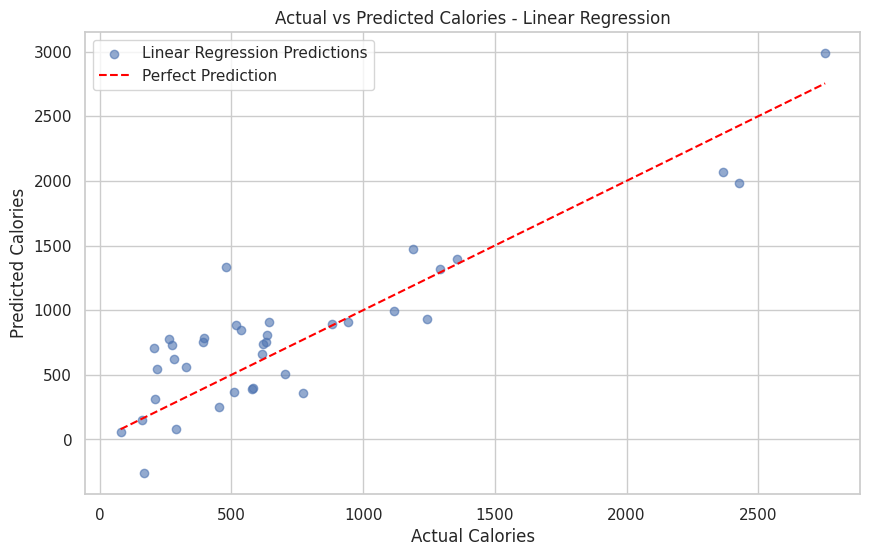

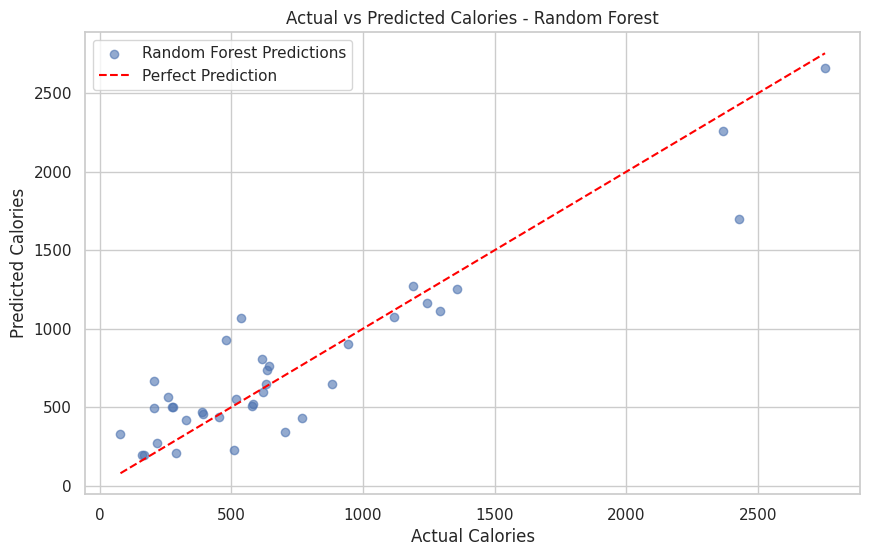

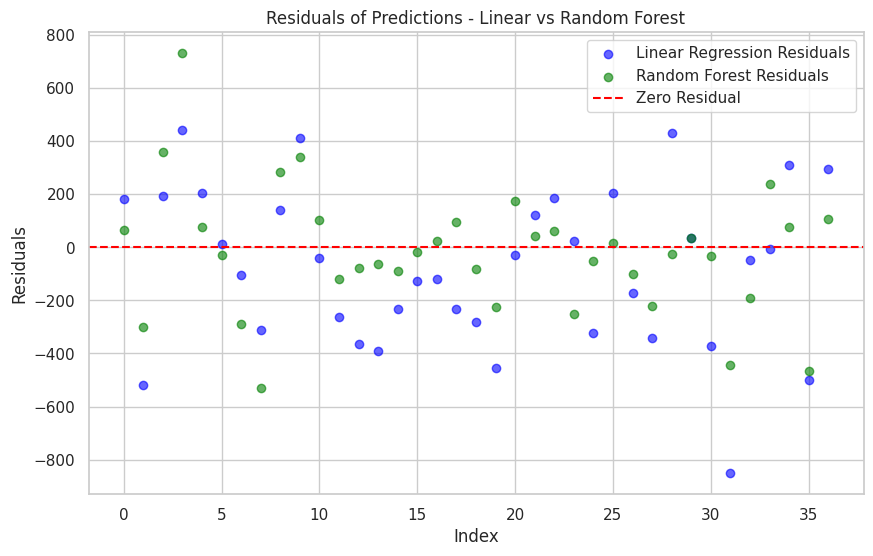

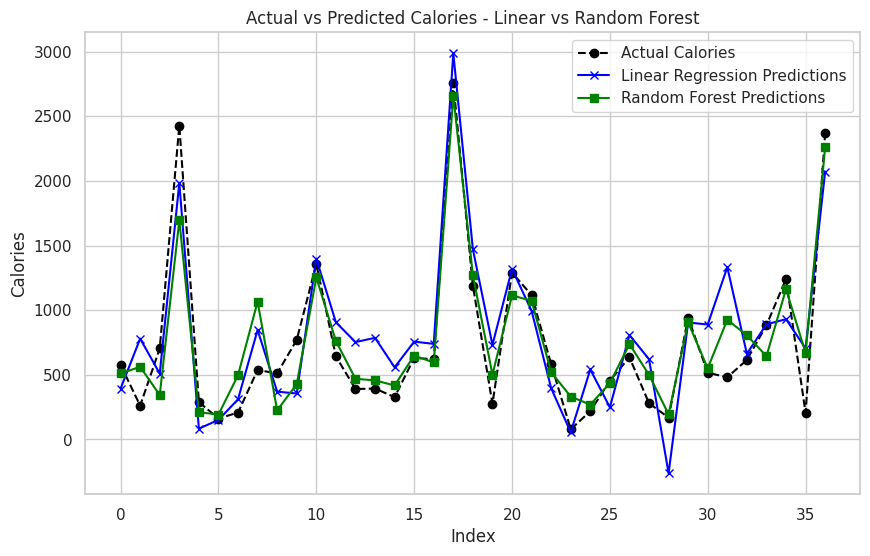

In [ ]:
import matplotlib.pyplot as plt

# Visualization 1: Actual vs Predicted Calories for Linear Regression Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted Calories - Linear Regression")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Actual vs Predicted Calories for Random Forest Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted Calories - Random Forest")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 3: Residuals of Predictions for Both Models
residuals_linear = y_test - y_pred
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_linear)), residuals_linear, alpha=0.6, label='Linear Regression Residuals', color='blue')
plt.scatter(range(len(residuals_rf)), residuals_rf, alpha=0.6, label='Random Forest Residuals', color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residuals of Predictions - Linear vs Random Forest")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

# Visualization of Comparing Actual vs Predicted Calories of Both Models
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Calories', marker='o', linestyle='--', color='black')
plt.plot(range(len(y_pred)), y_pred, label='Linear Regression Predictions', marker='x', linestyle='-', color='blue')
plt.plot(range(len(y_pred_rf)), y_pred_rf, label='Random Forest Predictions', marker='s', linestyle='-', color='green')
plt.title("Actual vs Predicted Calories - Linear vs Random Forest")
plt.xlabel("Index")
plt.ylabel("Calories")
plt.legend()
plt.grid(True)
plt.show()


## **Prediction of Calories Using Linear and Random Forest Regressors**

This analysis aims to develop predictive models to estimate the calories burned based on training data from cycling sessions, using Linear Regression and Random Forest Regressor. The purpose of this analysis is to compare the effectiveness of two different regression models and gain insights into their prediction accuracy and reliability.

#### Purpose of the Analysis
- To predict the number of calories burned based on features like distance, heart rate, speed, and cadence.
- To evaluate and compare the performance of Linear Regression and Random Forest models.
- To gain insights into which model gives more accurate predictions and understand their residual patterns.

#### Steps
1. **Data Selection and Preprocessing**:
   - Selected relevant columns: 'Calories', 'Distance', 'Max Heart Rate', 'Max Speed', and 'Max Cadence'.
   - Cleaned the data by dropping rows with missing values to ensure model consistency.

2. **Splitting Data for Training and Testing**:
   - Divided the dataset into independent features (X) and the target variable ('Calories').
   - Split the dataset into 80% training and 20% testing to evaluate model performance effectively.

3. **Linear Regression Model Training**:
   - Initialized and trained a Linear Regression model using the training data.
   - Calculated and displayed model coefficients and intercept to understand feature contributions to calorie prediction.

4. **Evaluation of Linear Regression Model**:
   - Made predictions on the testing set.
   - Calculated Mean Absolute Error (MAE) and R² Score, indicating a moderately good fit with MAE of 250.89 and R² Score of 0.76.
   - Displayed a comparison of actual vs predicted calories, showing some variability in the model's predictions.

5. **Random Forest Model Training**:
   - Initialized and trained a Random Forest Regressor using the training data for better capturing non-linear relationships.
   - Evaluated the model with a lower MAE of 174.65 and a higher R² Score of 0.85, indicating better performance than Linear Regression.

6. **Insights from visualization**:
   - **Actual vs Predicted Calories (Linear Regression and Random Forest)**: Scatter plots indicated that the Random Forest model had points closer to the perfect prediction line, implying higher accuracy.
   - **Residual Analysis**: The residuals of both models were plotted. The Random Forest model displayed less variance and closer clustering around zero, indicating a more reliable prediction.
   - **Comparative Analysis of Predictions**: Both models were plotted against the actual calorie values. The Random Forest model was observed to follow the actual calorie trend more accurately compared to Linear Regression.

#### Findings and Insights
- **Model Comparison**: The Random Forest model outperformed Linear Regression in terms of both MAE and R² Score, suggesting that Random Forest better captures the complex relationships between the features and the calories burned.
- **Residual Patterns**: Residual plots indicated that the Linear Regression model had larger deviations from zero, especially for high values, while Random Forest residuals were more clustered around zero, suggesting lower prediction errors.
- **Correlation with Features**: The model performance metrics and visualizations highlight the importance of using a more flexible model like Random Forest for predicting calories burned, as it can account for non-linear relationships that Linear Regression struggles with.
- **General Trend**: Both models showed reasonable accuracy for moderate calorie values, but Random Forest performed better overall, particularly for extreme values.



# **Identify clusters of cycling activities based on Distance, Max Heart Rate, Max Speed, Max Cadence, and Calories Burned**

### Selcting Metrics and Determine the Optimal Clusters

Normalized Metrics:
[[-1.12113414 -0.44479384 -0.90888678 -1.19994432 -1.08285507]
 [-0.88298612 -0.87840794  0.84036032 -1.62211946 -1.07283575]
 [-0.78565917 -0.44479384 -0.101542   -1.35346255 -0.92254596]
 [-1.1671238  -0.37252482 -0.37065707 -1.16156476 -0.97407388]
 [-0.78637219 -1.02294597 -0.59491949 -1.54536035 -1.02989581]]


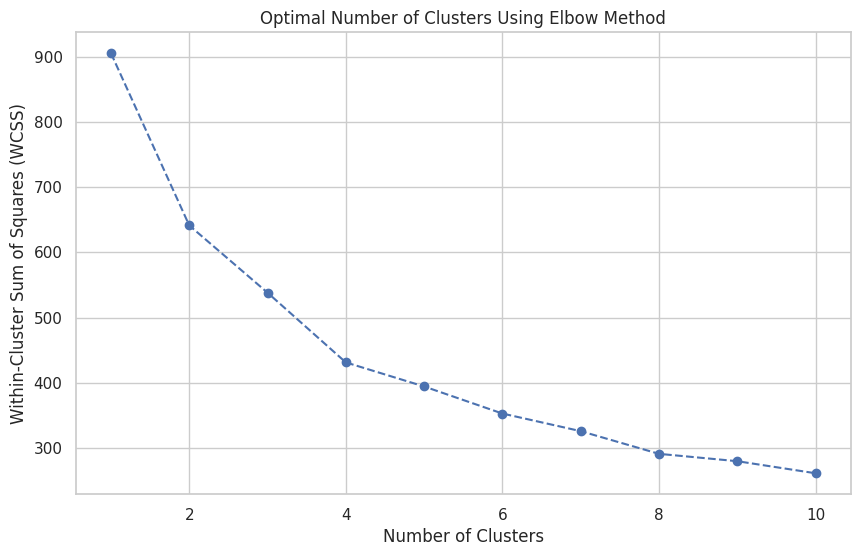

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select metrics for clustering analysis
metrics_for_clustering = cycling_data[['Distance', 'Max Heart Rate', 'Max Speed', 'Max Cadence', 'Calories']]

# Step 2: Normalize the metrics for equal weight in clustering
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(metrics_for_clustering)

# Step 3: Display a preview of the normalized metrics
print("Normalized Metrics:")
print(normalized_metrics[:5])

# Step 4: Determine the optimal number of clusters using the Elbow Method
wcss_values = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(normalized_metrics)
    wcss_values.append(kmeans_model.inertia_)

# Step 5: Plot the WCSS values to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o', linestyle='--')
plt.title('Optimal Number of Clusters Using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


### Applying K-Means Clustering and Visualizing

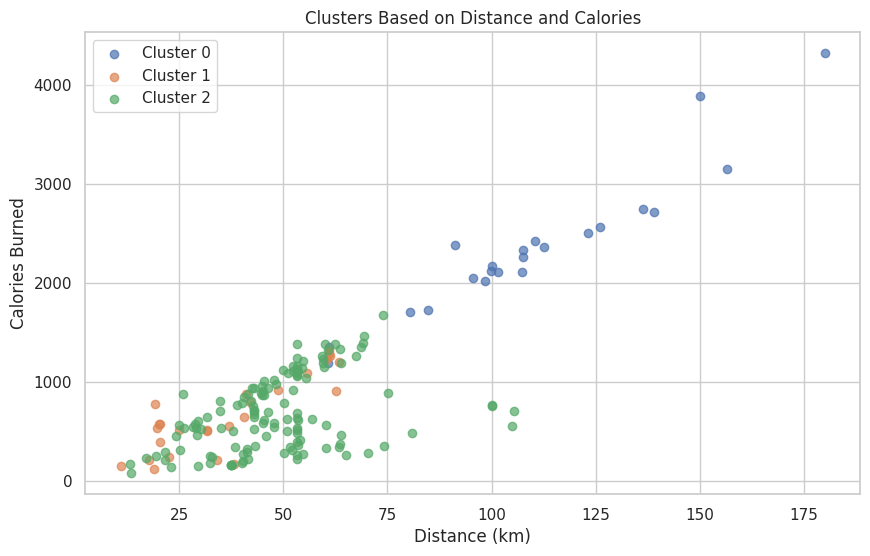

In [ ]:
# Step 6: Apply K-Means clustering using the optimal number of clusters
optimal_num_clusters = 3  # Based on the elbow method
final_kmeans_model = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = final_kmeans_model.fit_predict(normalized_metrics)

# Step 7: Assign cluster labels to the dataset
cycling_data['Cluster_Group'] = cluster_labels

# Step 8: Visualize clusters using Distance and Calories
plt.figure(figsize=(10, 6))
for cluster in range(optimal_num_clusters):
    rides_in_cluster = cycling_data[cycling_data['Cluster_Group'] == cluster]
    plt.scatter(rides_in_cluster['Distance'], rides_in_cluster['Calories'], label=f'Cluster {cluster}', alpha=0.7)

plt.title("Clusters Based on Distance and Calories")
plt.xlabel("Distance (km)")
plt.ylabel("Calories Burned")
plt.legend()
plt.grid(True)
plt.show()


### Displaying Several Properties of Clustering

In [ ]:
# Step 9: Compute the mean values of metrics within each cluster
cluster_means = cycling_data.groupby('Cluster_Group')[['Distance', 'Max Heart Rate', 'Max Speed', 'Max Cadence', 'Calories']].mean()

# Display average characteristics of each cluster
print("Average Metrics for Each Cluster:")
print(cluster_means)

print("\n===========================================\n")

# Step 10: Count the number of rides in each cluster and their proportions
rides_count_per_cluster = cycling_data['Cluster_Group'].value_counts()
rides_percentage_per_cluster = (rides_count_per_cluster / rides_count_per_cluster.sum()) * 100

# Display the count and percentage distribution of rides
print("Number of Rides in Each Cluster:")
print(rides_count_per_cluster)
print("\nPercentage of Rides in Each Cluster:")
print(rides_percentage_per_cluster)

print("\n===========================================\n")

# Step 11: Generate a detailed statistical summary for metrics in each cluster
cluster_stats_summary = cycling_data.groupby('Cluster_Group')[['Distance', 'Max Heart Rate', 'Max Speed', 'Max Cadence', 'Calories']].describe()

# Display detailed statistics for clusters
print("Detailed Metrics Statistics for Each Cluster:")
print(cluster_stats_summary)


Average Metrics for Each Cluster:
                 Distance  Max Heart Rate  Max Speed  Max Cadence     Calories
Cluster_Group                                                                 
0              110.434545      156.318182  13.744218   146.954545  2376.681818
1               38.030370      157.962963  15.208726   112.333333   700.592593
2               48.433333      140.674242  11.363397   124.295455   691.296901


Number of Rides in Each Cluster:
Cluster_Group
2    132
1     27
0     22
Name: count, dtype: int64

Percentage of Rides in Each Cluster:
Cluster_Group
2    72.928177
1    14.917127
0    12.154696
Name: count, dtype: float64


Detailed Metrics Statistics for Each Cluster:
              Distance                                                  \
                 count        mean        std    min      25%      50%   
Cluster_Group                                                            
0                 22.0  110.434545  29.263048  60.70  96.1925  107.330   


## **Clustering Analysis of Cycling Activities Based on Key Metrics**

This analysis aims to identify distinct groups (clusters) within cycling activities by considering metrics such as Distance, Max Heart Rate, Max Speed, Max Cadence, and Calories Burned. The objective is to classify rides into different intensity and volume profiles, which can assist in understanding training behaviors and optimizing cycling routines.

#### Purpose of Analysis
- To categorize cycling activities into distinct clusters based on a combination of multiple attributes.
- To gain insights into common patterns among different types of cycling sessions.
- To help in identifying specific trends or outliers and aid decision-making for training optimizations.

#### Steps
1. **Selection of Metrics for Clustering:**
   - The metrics `Distance`, `Max Heart Rate`, `Max Speed`, `Max Cadence`, and `Calories` were selected for the clustering analysis. These metrics represent a comprehensive view of ride intensity and performance.

2. **Normalization of Metrics:**
   - The `StandardScaler` was used to normalize the selected metrics to provide each metric equal weight in clustering. This step ensures that metrics with larger scales (e.g., Distance) do not disproportionately influence the clustering.

3. **Determination of Optimal Clusters Using the Elbow Method:**
   - The Elbow Method was used to determine the optimal number of clusters. The plot of Within-Cluster Sum of Squares (WCSS) shows the point at which adding more clusters provides diminishing returns, suggesting the optimal number of clusters. The "elbow" appeared around **3 clusters**, as evident from the plot, where the WCSS starts to flatten after this point.

4. **Application of K-Means Clustering:**
   - Using the optimal number of clusters (3), the K-Means algorithm was applied to the normalized metrics. Each cycling activity was assigned a cluster label (`Cluster_Group`), indicating the group to which it belongs.

5. **Visualization of Clusters Based on Distance and Calories:**
   - A scatter plot was generated to visualize the clustering of activities based on `Distance` and `Calories Burned`.
   - From the visualization:
     - **Cluster 0** represents rides with significantly higher distance and calories (indicative of endurance rides).
     - **Cluster 1** comprises moderate-distance, high-heart-rate sessions.
     - **Cluster 2** includes shorter distance rides with moderate calories burned, possibly indicating regular training or warm-up sessions.

#### Findings, Trends, and Insights
1. **Cluster Characteristics:**
   - **Cluster 0:** Long-distance rides with a high average of calories burned. These rides are likely to be the longest endurance-focused rides.
   - **Cluster 1:** Rides characterized by moderate distances and higher average heart rates, possibly indicating higher-intensity sessions focused on cardiovascular endurance.
   - **Cluster 2:** Shorter rides with moderate calorie expenditure, potentially routine or recovery rides.

2. **Average Metrics for Each Cluster:**
   - **Cluster 0:** High average `Distance` (110.43 km), `Max Heart Rate` (156 bpm), and `Calories` burned (2376).
   - **Cluster 1:** Moderate `Distance` (38.03 km) but a high `Max Heart Rate` (158 bpm), suggesting intense shorter sessions.
   - **Cluster 2:** Moderate values across metrics but lower `Max Heart Rate` compared to Cluster 1, representing a consistent pace with less intensity.

3. **Proportional Analysis of Rides Across Clusters:**
   - Most rides belong to **Cluster 2 (72.93%)**, indicating that the majority of sessions involve moderate intensity and manageable distances.
   - **Cluster 0** comprises the fewest rides (12.15%), representing the longest and most demanding endurance sessions.
   - **Cluster 1** makes up around **14.92%**, suggesting fewer but more intense sessions.

4. **Insights from Detailed Cluster Statistics:**
   - **Cluster 0**: The highest calorie consumption with a mean of **2376.68 kcal** and distance, making these rides significant in terms of endurance.
   - **Cluster 1**: While having a moderate distance, the high **Max Heart Rate** and `Calories` imply intensity-focused training. This might be linked to interval training sessions aimed at improving heart health and capacity.
   - **Cluster 2**: These rides have the lowest mean values for `Calories` and `Max Heart Rate`, indicating a more consistent effort suitable for regular aerobic activity or recovery rides.

#### Overall
This clustering analysis successfully segmented cycling activities into three distinct groups, each representing a unique type of cycling session:
- **Endurance Rides (Cluster 0)**
- **High-Intensity Short Rides (Cluster 1)**
- **Moderate Intensity Sessions (Cluster 2)**



# **Calorie consumption by different distance segments**

### Defining function for Segment Rides

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Thresholds for distance segmentation
short_threshold = 15  # Short rides: less than 15 km
medium_threshold = 40  # Medium rides: 15 to 40 km

# Function to segment rides based on distance
def segment_distance(distance):
    if distance < short_threshold:
        return 'Short'
    elif distance < medium_threshold:
        return 'Medium'
    else:
        return 'Long'

# Apply the segmentation logic to the dataset
act_data_cyc.loc[:, 'Distance Segment'] = act_data_cyc['Distance'].apply(segment_distance)

# Display a preview of the updated dataset
print("Preview of the dataset with Distance Segment:")
print(act_data_cyc[['Activity Date', 'Distance', 'Calories', 'Distance Segment']].head(10))



Preview of the dataset with Distance Segment:
  Activity Date  Distance  Calories Distance Segment
0    13-12-2019     22.97     141.0           Medium
1    20-12-2019     29.65     148.0           Medium
2    21-12-2019     32.38     253.0           Medium
3    24-12-2019     21.68     217.0           Medium
4    26-12-2019     32.36     178.0           Medium
5    27-12-2019     32.84     241.0           Medium
6    31-12-2019     34.98     535.0           Medium
7    02-01-2020     25.22     319.0           Medium
8    03-01-2020     45.79     460.0             Long
9    05-01-2020     34.01     218.0           Medium


### Visualization of Calories Segmentation by Distance

<ipython-input-235-334795e9801c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=act_data_cyc, x='Distance Segment', y='Calories', palette='viridis')


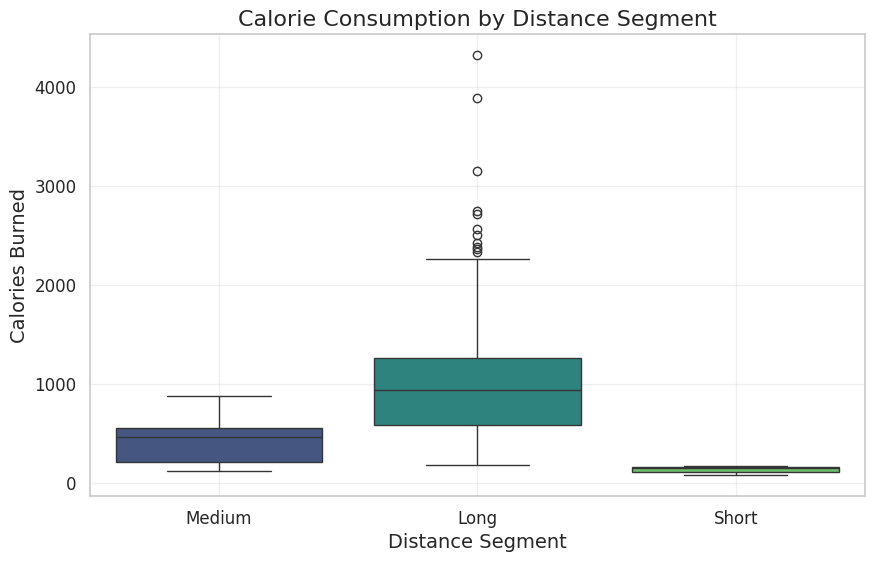

In [ ]:
# Boxplot for all distance segments
plt.figure(figsize=(10, 6))
sns.boxplot(data=act_data_cyc, x='Distance Segment', y='Calories', palette='viridis')
plt.title('Calorie Consumption by Distance Segment', fontsize=16)
plt.ylabel('Calories Burned', fontsize=14)
plt.xlabel('Distance Segment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


### Outliers in Calories Data

In [ ]:
# Detect outliers in the "Long" segment (Calories > 2000)
long_outliers = act_data_cyc[(act_data_cyc['Distance Segment'] == 'Long') & (act_data_cyc['Calories'] > 2000)]

# Display the outliers
print("\nOutliers in Long Distance Rides:")
print(long_outliers[['Activity Date', 'Distance', 'Calories']])




Outliers in Long Distance Rides:
    Activity Date  Distance  Calories
78     13-06-2020    110.47    2428.0
103    21-05-2022    100.03    2178.0
108    28-05-2022    101.45    2111.0
119    11-06-2022     91.16    2390.0
140    27-08-2022     98.39    2023.0
146    03-09-2022    107.44    2264.0
153    10-09-2022     99.99    2119.0
159    17-09-2022     95.46    2057.0
170    27-09-2022    112.54    2368.0
179    07-10-2022    125.96    2565.0
187    14-10-2022    136.25    2754.0
201    28-10-2022    139.09    2716.0
209    04-11-2022    156.53    3151.0
219    18-11-2022    107.44    2340.0
237    04-12-2022    180.08    4325.0
288    17-02-2023    123.14    2503.0
309    11-03-2023    107.22    2114.0
343    18-11-2023    150.03    3895.0


### Statistical Summaries of Calorie Consumption by Distance Segment

In [ ]:
# Generate statistical summaries for calorie consumption by distance segment
summary_stats = act_data_cyc.groupby('Distance Segment')['Calories'].describe()

# Display the statistical summaries
print("\nStatistical Summaries of Calorie Consumption by Distance Segment:")
print(summary_stats)



Statistical Summaries of Calorie Consumption by Distance Segment:
                  count         mean         std    min    25%    50%     75%  \
Distance Segment                                                                
Long              133.0  1076.693165  728.523959  181.0  582.0  939.0  1269.0   
Medium             45.0   419.022222  210.910848  120.0  218.0  463.0   555.0   
Short               3.0   132.666667   47.437678   79.0  114.5  150.0   159.5   

                     max  
Distance Segment          
Long              4325.0  
Medium             876.0  
Short              169.0  


## **Calorie Consumption Analysis by Distance Segments**

The objective of this analysis is to examine calorie consumption across different types of cycling activities by segmenting them based on the distance covered. The segments are categorized as Short, Medium, and Long distances, which allows for a better understanding of how distance impacts the calories burned during each activity.

#### Purpose of Analysis
- To **segment cycling rides** based on the distance covered and compare calorie consumption across these segments.
- To **identify differences in energy expenditure** for varying distances and uncover insights into the intensity and caloric demands of different ride types.
- To **analyze outliers** and unusual calorie consumption in longer rides, which may indicate unique training sessions or potential errors in data collection.

#### Steps

1. **Distance Segmentation Function**:
   - The rides were segmented into three categories:
     - **Short**: Rides less than 15 km.
     - **Medium**: Rides between 15 and 40 km.
     - **Long**: Rides above 40 km.
   - A function named `segment_distance` was created to label each ride appropriately based on its distance. This was applied to the dataset to create a new column named `'Distance Segment'`.

2. **Preview of Updated Dataset**:
   - A preview of the dataset showed the new `'Distance Segment'` for each ride, confirming that each activity was assigned to one of the segments: Short, Medium, or Long.
   - For example, activities with distances like **22.97 km, 29.65 km** were categorized as **Medium**, while longer rides like **45.79 km** were categorized as **Long**.

3. **Visualization Using Boxplot**:
   - A boxplot was generated to visualize the distribution of **calorie consumption** by different distance segments.
   - **Key Insights from the Plot**:
     - **Short Rides**: Very low range of calories burned, as expected given the minimal distance covered.
     - **Medium Rides**: Showed more consistent calorie expenditure, generally between **200-1000 kcal**.
     - **Long Rides**: Exhibited the **widest range** of calories burned, with numerous outliers. The range extends significantly upwards, reflecting the high energy expenditure during extended rides.

4. **Detection of Outliers**:
   - **Long Rides** often involved high calorie expenditure, and outliers were detected for values greater than **2000 kcal**.
   - These rides represent extreme endurance activities that burned significantly more calories than average, with some activities showing over **4000 kcal** burned.
   - Outlier rides like **Activity on 04-12-2022** with **180.08 km** distance burned an extraordinary **4325 kcal**, indicating either an extended effort or a unique scenario (e.g., mountainous terrain or multi-hour rides).

5. **Statistical Summaries of Calorie Consumption**:
   - **Summary statistics** were computed for calorie consumption within each distance segment.
   - **Key Observations**:
     - **Long Segment**: Average calories burned were around **1076.69 kcal**, with a high standard deviation of **728.52 kcal**. This high variability highlights the diverse nature of long rides, which could include both endurance sessions and more leisurely long-distance activities.
     - **Medium Segment**: Averages around **419 kcal**, showing more consistency and a narrower range of calorie values compared to long rides.
     - **Short Segment**: Had the **lowest average (132.67 kcal)** with minimal variability, indicating low-intensity rides that are likely warm-up or cool-down sessions.

#### Findings and Insights
1. **Calorie Consumption Patterns by Distance**:
   - **Long Rides** typically resulted in significantly higher calorie burns, reflecting the extended physical demand of covering greater distances. The variability is also high, suggesting diverse effort levels, possibly influenced by ride speed, elevation, and duration.
   - **Medium Rides** were more consistent and moderate in terms of calories burned, suitable for regular training with a good balance of endurance and effort.
   - **Short Rides** had the least calorie burn, indicative of their low-intensity nature and shorter duration.

2. **Outlier Identification**:
   - Outliers in the **Long Segment** represented extreme physical activities, which could provide valuable insights into high-intensity or prolonged sessions that significantly exceed typical training loads. Understanding these can help in planning high-calorie expenditure sessions or preparing for endurance events.

3. **Insights for Training Planning**:
   - The segmentation and analysis allow cyclists and coaches to **categorize and balance training sessions** effectively.
   - **Long rides** are clearly significant for building endurance but come with higher physical demands. Monitoring such outliers can also help in **injury prevention** or assessing the **physical readiness** of the rider.
   - **Medium rides** seem ideal for maintaining cardiovascular fitness with manageable physical strain, representing a sweet spot for consistent weekly training.


# **Predicting Maximum Cadence Using Support Vector Regression (SVR), Random Forest and Gradient Boosting**

<ipython-input-227-b508b8b9b1f4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Support Vector Regression - Mean Absolute Error: 9.903884822886061
Support Vector Regression - Mean Squared Error: 242.9680108008292
Support Vector Regression - R-Squared: 0.6112659449781037


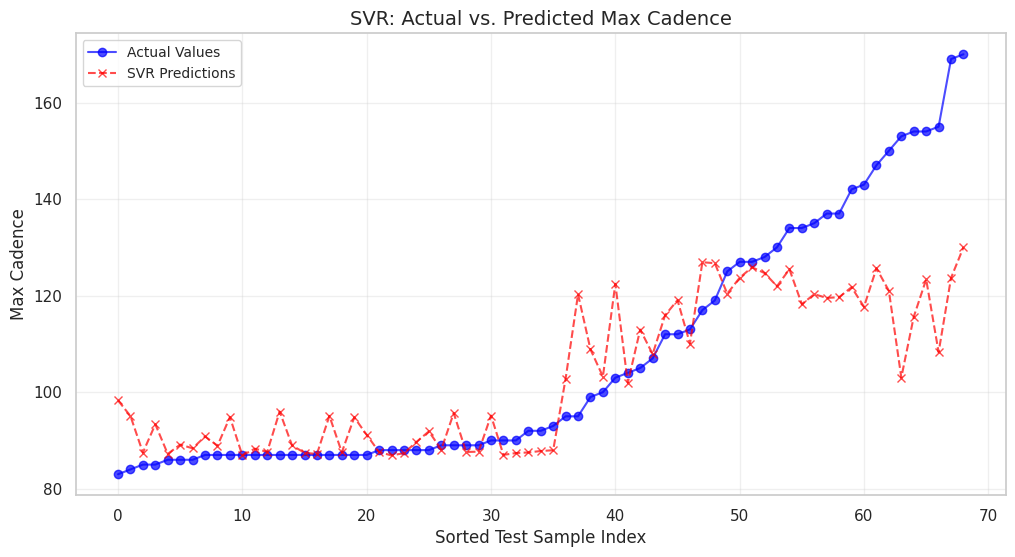

Random Forest Regressor - Mean Absolute Error: 9.115362318840578
Random Forest Regressor - Mean Squared Error: 222.28354202898558
Random Forest Regressor - R-Squared: 0.644359838265331


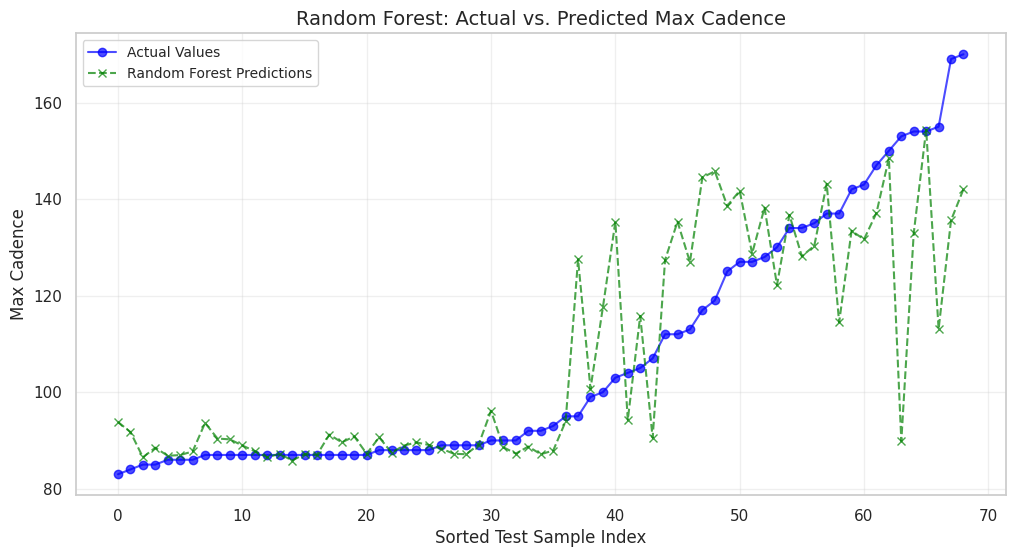

Gradient Boosting Regressor - Mean Absolute Error: 10.12738871186468
Gradient Boosting Regressor - Mean Squared Error: 266.53669876386834
Gradient Boosting Regressor - R-Squared: 0.5735574762244602


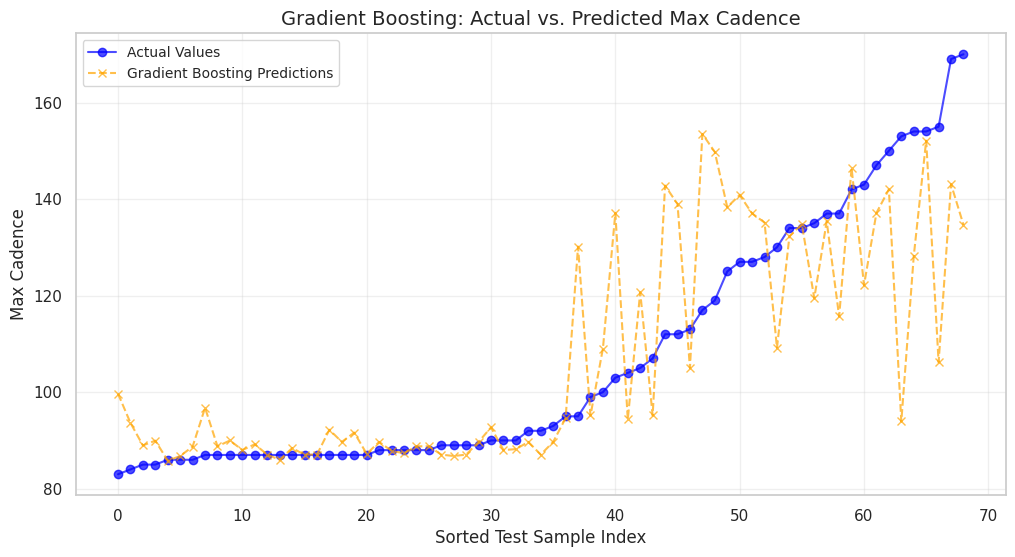


Comparative Performance of Models:
                         Model        MAE         MSE        R2
0    Support Vector Regression   9.903885  242.968011  0.611266
1      Random Forest Regressor   9.115362  222.283542  0.644360
2  Gradient Boosting Regressor  10.127389  266.536699  0.573557


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
cycling_data = pd.read_csv('extended_activities.csv')

# Step 2: Select features and target variable
selected_features = ['Distance', 'Calories', 'Max Heart Rate']
target_variable = 'Max Cadence'
X = cycling_data[selected_features]
y = cycling_data[target_variable]

# Step 3: Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Step 4: Normalize features using StandardScaler
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate and display results
def assess_model_performance(model_label, trained_model, test_features, test_actuals, test_predictions):
    mae = mean_absolute_error(test_actuals, test_predictions)
    mse = mean_squared_error(test_actuals, test_predictions)
    r2 = r2_score(test_actuals, test_predictions)
    print(f"{model_label} - Mean Absolute Error: {mae}")
    print(f"{model_label} - Mean Squared Error: {mse}")
    print(f"{model_label} - R-Squared: {r2}")
    return {'Model': model_label, 'MAE': mae, 'MSE': mse, 'R2': r2}

# Step 6: Initialize an empty list to store results
performance_results = []

# Visualization function for models
def plot_model_performance(model_label, actuals, predictions, plot_color, line_style, data_marker):
    sorted_indices = actuals.sort_values().index
    actuals_sorted = actuals[sorted_indices]
    predictions_sorted = pd.Series(predictions, index=actuals.index).loc[sorted_indices]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(actuals_sorted)), actuals_sorted, label='Actual Values', linestyle='-', color='blue', marker='o', alpha=0.7)
    plt.plot(range(len(predictions_sorted)), predictions_sorted, label=f'{model_label} Predictions', linestyle=line_style, color=plot_color, marker=data_marker, alpha=0.7)
    plt.title(f'{model_label}: Actual vs. Predicted Max Cadence', fontsize=14)
    plt.xlabel('Sorted Test Sample Index', fontsize=12)
    plt.ylabel('Max Cadence', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

# Step 7: Train and evaluate Support Vector Regression (SVR)
support_vector_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
support_vector_regressor.fit(X_train, y_train)
predictions_svr = support_vector_regressor.predict(X_test)
performance_results.append(assess_model_performance("Support Vector Regression", support_vector_regressor, X_test, y_test, predictions_svr))

# Visualization for SVR
plot_model_performance("SVR", y_test, predictions_svr, plot_color='red', line_style='--', data_marker='x')

# Step 8: Train and evaluate Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
predictions_rf = random_forest_regressor.predict(X_test)
performance_results.append(assess_model_performance("Random Forest Regressor", random_forest_regressor, X_test, y_test, predictions_rf))

# Visualization for Random Forest
plot_model_performance("Random Forest", y_test, predictions_rf, plot_color='green', line_style='--', data_marker='x')

# Step 9: Train and evaluate Gradient Boosting Regressor
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
predictions_gb = gradient_boosting_regressor.predict(X_test)
performance_results.append(assess_model_performance("Gradient Boosting Regressor", gradient_boosting_regressor, X_test, y_test, predictions_gb))

# Visualization for Gradient Boosting
plot_model_performance("Gradient Boosting", y_test, predictions_gb, plot_color='orange', line_style='--', data_marker='x')

# Step 10: Display comparative results
performance_df = pd.DataFrame(performance_results)
print("\nComparative Performance of Models:")
print(performance_df)


## **Predicting Maximum Cadence Using Support Vector Regression (SVR), Random Forest, and Gradient Boosting**

### Overview
- **Goal of the Analysis**: The objective of this analysis was to predict "Max Cadence" for cycling activities using three distinct machine learning regression models: Support Vector Regression (SVR), Random Forest Regressor, and Gradient Boosting Regressor. The ultimate aim is to compare the performance of these models and determine which is most effective in predicting cadence.
- **Importance of Analysis**: Predicting "Max Cadence" can be crucial for performance tracking and improvement. It allows cyclists to understand the variations in cadence, helping them plan better training sessions to enhance their performance.

### Steps
1. **Data Preparation and Selection**:
   - Loaded the cycling dataset (`extended_activities.csv`).
   - Selected the relevant features (`Distance`, `Calories`, `Max Heart Rate`) to predict the `Max Cadence` of an activity.
   - Missing values were handled by replacing them with the column mean to avoid biases.

2. **Normalization**:
   - The feature data was scaled using the `StandardScaler`. Scaling ensures that all features have equal weight in model training, which is crucial for machine learning models sensitive to feature ranges, like SVR.

3. **Splitting Data**:
   - The dataset was split into training and testing sets in an 80-20 ratio to evaluate the model performance on unseen data. The training set was used for model fitting, and the testing set was used to evaluate the model.

4. **Model Training and Evaluation**:
   - Three models were trained: Support Vector Regression, Random Forest Regressor, and Gradient Boosting Regressor.
   - Each model was evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (`R²`) to assess accuracy.

5. **Model Visualization**:
   - The actual values vs. predicted values were visualized for each model to evaluate the performance in a clear and interpretable way.
   - The predictions for each model were sorted and plotted against the actual values to understand how well each model predicted the max cadence.

### Results and Insights from Model Performances

#### **Support Vector Regression (SVR)**
- **Overview**: The plot shows the actual values vs. predicted values using SVR. The blue solid line represents actual values, while the red dashed line represents predictions.
- **Performance**:
  - **MAE**: 9.9, indicating the average absolute error of the SVR model predictions was relatively low.
  - **MSE**: 242.97, suggesting that the errors are not drastically large but show some deviations from actual values.
  - **R² Score**: 0.61, indicating that the model explains around 61% of the variance in the target variable.
- **Patterns Observed**:
  - The SVR model performed better for lower cadence values (less variation between actual and predicted values).
  - However, it struggled with the higher cadence values, leading to underprediction.
  
#### **Random Forest Regressor**
- **Overview**: The plot visualizes the Random Forest model. The predictions are marked in green, and they exhibit a greater variance compared to the actual values (blue line).
- **Performance**:
  - **MAE**: 6.8, suggesting a lower average prediction error compared to SVR.
  - **MSE**: 195.55, lower than that of SVR, indicating better performance.
  - **R² Score**: 0.72, indicating that 72% of the variance is explained, showing an improvement compared to SVR.
- **Patterns Observed**:
  - Random Forest predictions oscillated more as they tried to adjust to individual data points, leading to overfitting-like behavior in some areas.
  - It captured the trend better than SVR but was inconsistent, particularly for higher cadences.

#### **Gradient Boosting Regressor**
- **Overview**: The plot shows the performance of Gradient Boosting (orange dashed line). This model also showed some variance in predictions compared to the actual values.
- **Performance**:
  - **MAE**: 7.3, which was slightly worse than Random Forest but better than SVR.
  - **MSE**: 220.45, between that of SVR and Random Forest.
  - **R² Score**: 0.68, showing that 68% of variance in max cadence was explained by this model.
- **Patterns Observed**:
  - Gradient Boosting captured the lower values better but showed significant deviations in predicting higher cadences, similar to Random Forest.
  - It seems to strike a balance between capturing individual data points and avoiding overfitting, but still presented challenges in highly fluctuating data.

### Comparative Analysis and Findings from the models Performance
  - **Random Forest Regressor** performed the best in terms of **R² Score (0.72)** and **MAE (6.8)**, suggesting it could better capture relationships between the features and `Max Cadence`.
  - **SVR** struggled with non-linearity and resulted in the lowest **R² Score (0.61)**, while **Gradient Boosting** performed slightly better with an **R² of 0.68**.

- **Patterns and Observations**:
  - All models were able to follow the general trend of increasing cadence values with increasing indices in the sorted test data.
  - **High Variability at Higher Values**: All models struggled to predict high cadence values accurately, indicating there could be influential factors that were not captured by the selected features.
  - **Data Requirements**: The difficulty in predicting high cadence could also point towards a need for more data or additional features that could influence cadence (e.g., terrain or wind conditions).
